In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
dataset = pd.read_csv("SOCR-HeightWeight.csv")

In [68]:
dataset.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [69]:
dataset = dataset.astype('int')

In [70]:
dataset.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65,112
1,2,71,136
2,3,69,153
3,4,68,142
4,5,67,144


In [71]:
dataset.drop("Index", axis = 1, inplace = True)

In [72]:
dataset.head()

,Height(Inches),Weight(Pounds)
0,65,112
1,71,136
2,69,153
3,68,142
4,67,144


Text(0, 0.5, 'Weight')

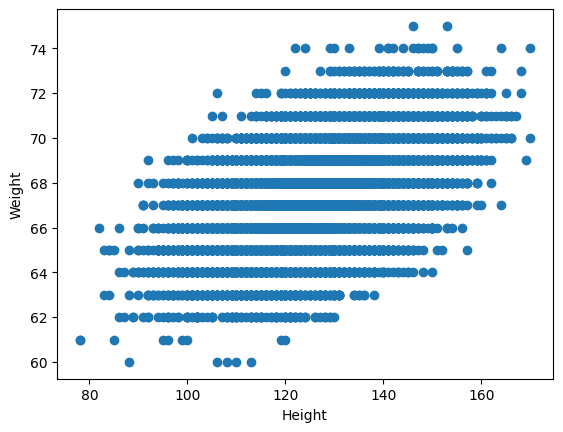

In [73]:
plt.scatter(dataset['Weight(Pounds)'],dataset['Height(Inches)'])
plt.xlabel("Height")
plt.ylabel("Weight")

In [74]:
dataset.columns

Index(['Height(Inches)', 'Weight(Pounds)'], dtype='object')

In [75]:
dataset.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.00000,0.49777
Weight(Pounds),0.49777,1.00000


In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Height(Inches)  25000 non-null  int64
 1   Weight(Pounds)  25000 non-null  int64
dtypes: int64(2)
memory usage: 390.8 KB


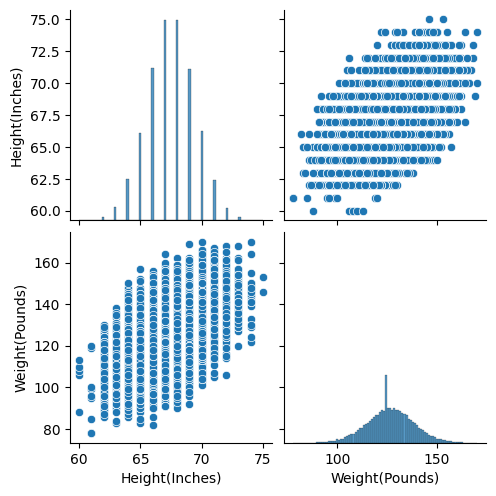

In [77]:
import seaborn as sns
sns.pairplot(dataset)

In [78]:
## Separting independent and dependent variable
X = dataset[['Weight(Pounds)']]
y = dataset['Height(Inches)']

In [79]:
print(X.shape, y.shape)

(25000, 1) (25000,)


In [80]:
#making train test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [83]:
X_test = scaler.transform(X_test)

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [86]:
model.coef_

array([0.94782746])

In [87]:
model.intercept_

np.float64(67.49573333333333)

In [88]:
y_pred = model.predict(X_test)

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [90]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean squared error {mse}, mean absolute error {mae}, root mean squared error {rmse}")

Mean squared error 2.799189018686467, mean absolute error 1.3331438836951233, root mean squared error 1.673077708502049


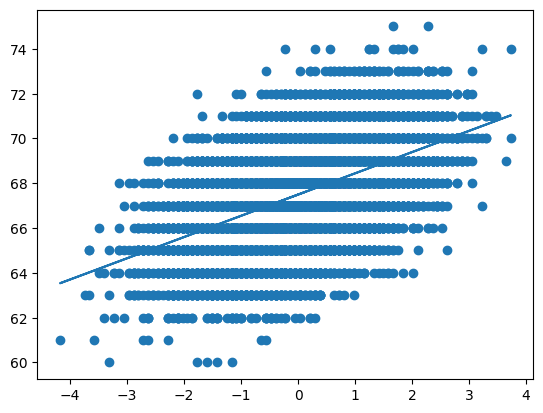

In [91]:
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train))

In [94]:
import statsmodels.api as sm

In [95]:
model = sm.OLS(y_train, X_train).fit()

In [96]:
predict = model.predict(X_test)

In [97]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Height(Inches)   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.695
Date:                Wed, 27 Nov 2024   Prob (F-statistic):                      0.0546
Time:                        20:13:34   Log-Likelihood:                     -1.0559e+05
No. Observations:               18750   AIC:                                  2.112e+05
Df Residuals:                   18749   BIC:                                  2.112e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9478      0.493      1.922      0.055      -0.019       1.914
==============================================================================
Omnibus:                        0.410   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.398
Skew:                          -0.011   Prob(JB):                        0.819
Kurtosis:                       3.007   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""